In [1]:
import ffn
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from get_tickers import get_tickers
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [5]:
#getting a list of S&P100 stocks
stocks = pd.DataFrame(get_tickers())
tickers = stocks["Symbol"]
tickers

0     AAPL
1     ABBV
2      ABT
3      ACN
4     ADBE
      ... 
95       V
96      VZ
97     WFC
98     WMT
99     XOM
Name: Symbol, Length: 100, dtype: object

In [6]:
#Iterate through the sp100 list to see if there are any tickers that have "issues"
for x in tickers:
    try:
        data = ffn.get(x, start = "2020-6-01")
    except Exception as e:
        print(f'There is a problem with {x} : {e}')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [7]:
#using the ffn library to pull data
data = ffn.get(tickers, start = '2020-06-01', end = '2020-12-31')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [10]:
#take a look at the data pull
data.tail()
len(data)

149

In [11]:
#calculate the daily and annual returns of the initial data pull
returns_daily = data.to_log_returns().dropna()
returns_annual = returns_daily.mean()*250
#return the length of the daily and annual returns dataframes for verification
len(returns_daily), len(returns_annual)

(148, 100)

In [12]:
#sort by annual returns in decreasing from highest annual return to lowest.
sort = pd.DataFrame(returns_annual.sort_values(ascending=False))

In [13]:
#create a list of top 20 tickers by annual return
top_20=sort[0:20].index
print(top_20)

Index(['tsla', 'fdx', 'qcom', 'de', 'amd', 'ups', 'aapl', 'ge', 'gm', 'avgo',
       'ms', 'dis', 'cat', 'f', 'pypl', 'nvda', 'dow', 'tgt', 'hon', 'schw'],
      dtype='object')


In [14]:
#create a new dataframe that has only the top 20 stocks
top_20_df = data[[column for column in top_20]]
top_20_df.head()

,tsla,fdx,qcom,de,amd,ups,aapl,ge,gm,avgo,ms,dis,cat,f,pypl,nvda,dow,tgt,hon,schw
Date,,,,,,,,,,,,,,,,,,,,
2020-06-01,59.873333,120.016083,72.308548,140.560410,53.630001,86.297157,78.490036,33.042835,26.320902,25.670080,38.922535,117.840515,110.123154,4.848892,154.529999,8.775335,31.236349,108.389313,134.161682,34.424004
2020-06-02,58.770668,124.170540,76.752449,144.151230,53.540001,87.939995,78.853401,34.460354,26.780104,26.384443,39.688793,117.820679,112.700302,4.873674,157.490005,8.794269,32.846298,107.808762,136.153290,35.018013
2020-06-03,58.863998,127.760567,76.871277,149.240585,52.730000,90.095695,79.287491,35.975632,28.401957,27.399769,40.846893,121.223831,116.145630,5.113227,156.779999,8.738716,33.679592,110.421227,140.742188,37.252602
2020-06-04,57.625332,128.806122,78.635170,151.870102,52.630001,89.704544,78.604668,37.833073,28.489889,27.343122,42.396824,122.722015,117.854614,5.427125,154.600006,8.739712,34.553337,108.815651,143.091736,39.298611
2020-06-05,59.043999,131.581894,80.929146,157.129059,53.099998,92.703384,80.843391,38.517387,29.906569,28.068104,43.128254,123.843170,123.484169,6.063181,156.000000,8.892743,35.572697,110.239792,148.102829,40.373478


In [15]:
top_20_df.to_csv("SP100 top 20 Returns Starting Jun_1_2020 to Dec_31_2020.csv")

In [16]:
#calculate the returns per the top_20 df
top_20_ret_daily = top_20_df.to_log_returns().dropna()
top_20_ret_ann = top_20_ret_daily.mean()*250

In [17]:
#view the annualized returns of the top 20 S&P100 stocks
top_20_ret_ann

tsla    2.285054
fdx     1.191188
qcom    1.096308
de      0.997611
amd     0.916938
ups     0.891652
aapl    0.863990
ge      0.784162
gm      0.743650
avgo    0.731282
ms      0.728895
dis     0.713255
cat     0.701149
f       0.695426
pypl    0.682829
nvda    0.678527
dow     0.658943
tgt     0.648968
hon     0.636991
schw    0.626164
dtype: float64

In [18]:
#calculate the daily and annual covariances
top_20_cov_daily = top_20_ret_daily.cov()
top_20_cov_annual = top_20_cov_daily*250 #250 trading days in a year.

In [19]:
# create empty lists to store returns, volatility, and weights of possible portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

In [20]:
####################################################
# set the number of portfolio combinations with    #
# the number of assets and portfolios as variables #
####################################################
num_assets = len(top_20)
num_portfolios = 50000

In [21]:
#set random seed
np.random.seed(42)

In [22]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, top_20_ret_ann)
    volatility = np.sqrt(np.dot(weights.T, np.dot(top_20_cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [23]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(top_20):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

In [24]:
#create the final dataframe with X number of portfolios randomized with different weights
sp_top_20 = pd.DataFrame(portfolio)

In [25]:
sp_top_20.tail()

,Returns,Volatility,Sharpe Ratio,tsla Weight,fdx Weight,qcom Weight,de Weight,amd Weight,ups Weight,aapl Weight,...,ms Weight,dis Weight,cat Weight,f Weight,pypl Weight,nvda Weight,dow Weight,tgt Weight,hon Weight,schw Weight
49995,0.862750,0.230012,3.750891,0.023849,0.058872,0.081873,0.079439,0.079293,0.067218,0.075667,...,0.076629,0.065312,0.018480,0.042486,0.041421,0.003595,0.028007,0.012545,0.054985,0.078710
49996,0.911505,0.243288,3.746603,0.095151,0.073217,0.028417,0.006514,0.029906,0.023266,0.031544,...,0.075296,0.069661,0.011623,0.021517,0.072756,0.079451,0.072211,0.023935,0.092120,0.021879
49997,0.830976,0.229548,3.620048,0.049655,0.014750,0.021546,0.042595,0.082838,0.059896,0.011420,...,0.076482,0.061944,0.059794,0.080511,0.047268,0.018222,0.057035,0.061589,0.056095,0.083305
49998,0.872628,0.243712,3.580565,0.069783,0.016156,0.096803,0.009263,0.014174,0.011871,0.040727,...,0.068615,0.063045,0.044374,0.076197,0.022585,0.050187,0.087900,0.091283,0.011713,0.043215
49999,0.822221,0.231013,3.559200,0.038867,0.013287,0.091154,0.008406,0.012599,0.056446,0.023744,...,0.049085,0.092628,0.001688,0.023135,0.059503,0.088291,0.043477,0.041564,0.042618,0.092404


In [26]:
# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio']+ [stock+' Weight' for stock in top_20]

In [27]:
# reorder dataframe columns
final = sp_top_20[column_order]

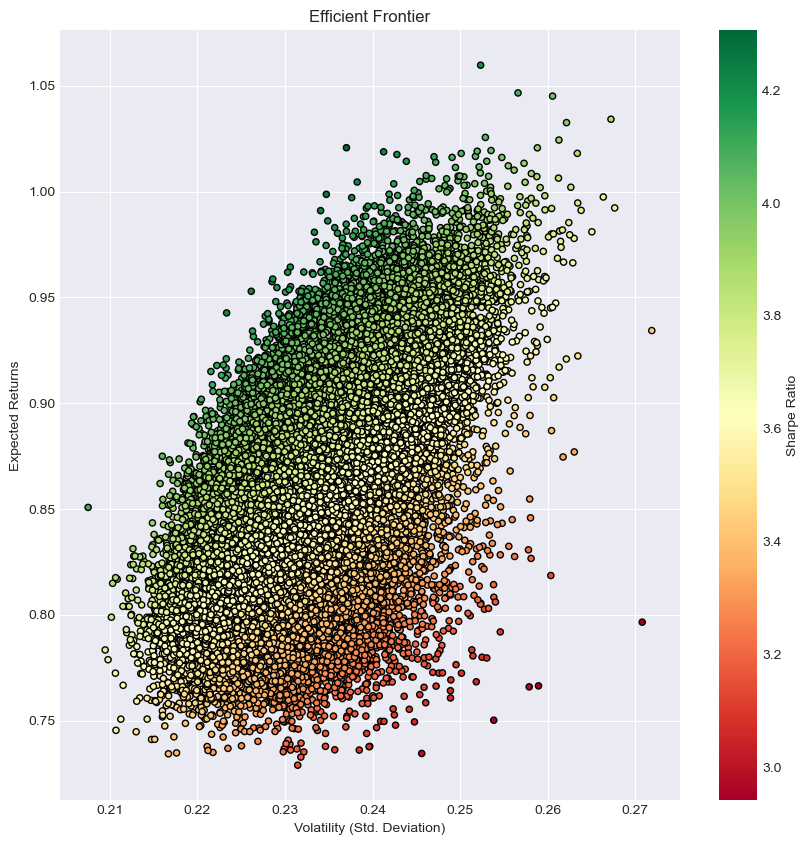

In [28]:
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
final.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 10), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

Text(0.5, 1.0, 'Efficient Frontier')

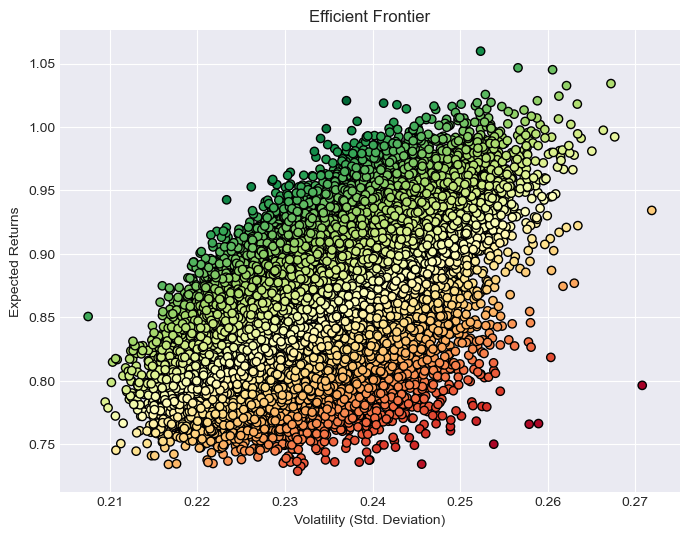

In [29]:
#plot using fig, ax
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(final["Volatility"],final['Returns'],
           c = final['Sharpe Ratio'],
          cmap='RdYlGn',
          edgecolors = 'black',
          )
ax.grid(True)
ax.set_xlabel('Volatility (Std. Deviation)')
ax.set_ylabel('Expected Returns')
ax.set_title('Efficient Frontier')

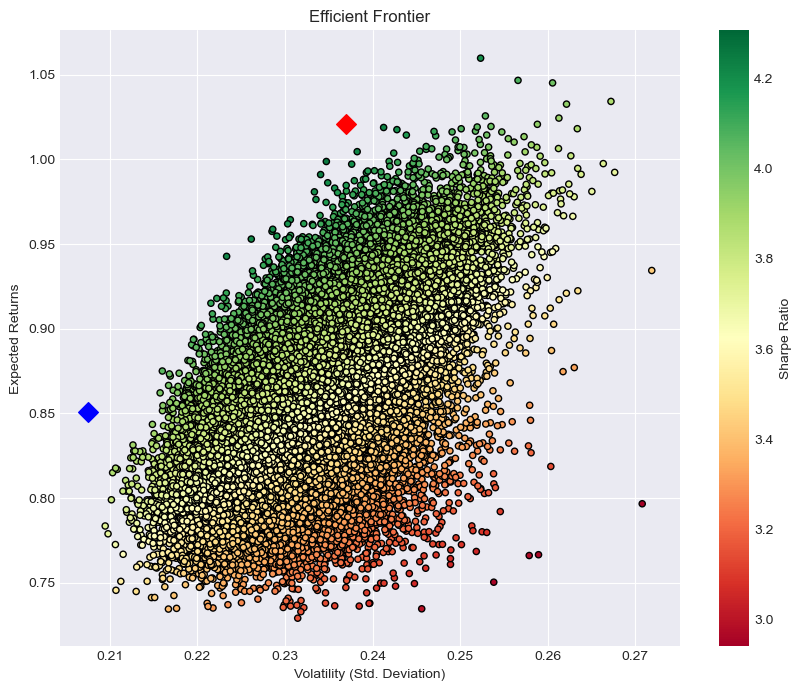

In [30]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = final['Volatility'].min()
max_sharpe = final['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = final.loc[final['Sharpe Ratio'] == max_sharpe]
min_variance_port = final.loc[final['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.available
plt.style.use('seaborn-v0_8-darkgrid')
final.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=100)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=100 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [31]:
min_variance_port.T.as_format(".2%").to_csv("min_var_top_20_sp100_june01-2020_to_dec_31_2020.csv")

In [32]:
sharpe_portfolio.T.as_format(".2%").to_csv("max_sharp_top_20_sp100_jun01-2020_to_dec_31_2020.csv")